In [3]:
%%time
from detoxify import Detoxify
from tqdm import tqdm

from cndlib.cndutils import find_file, dump_jsonl, load_jsonl

def generate_sentence_array(doc):
    output = []
    for sent in doc.sents:
        output.append({'text': sent.text.strip().replace('\n', '')})
    return output
    
def generate_results(texts):
    for text in tqdm(texts):
        results = Detoxify('original').predict(text['text'])
        results = {key: float(value) for (key, value) in results.items()}
        text.update(results)
    return texts

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 31.9 µs


In [ ]:
import spacy
from pprint import pprint
nlp = spacy.load('en_core_web_sm')

In [2]:
%%time
filename = "19630828-I Have a Dream.txt"
king_text = find_file(filename)

CPU times: user 2.45 ms, sys: 11 ms, total: 13.5 ms
Wall time: 16.1 ms


In [52]:
%%time
doc = nlp(king_text)
king_texts = generate_sentence_array(doc)
king_results = generate_results(king_texts)
dump_jsonl(king_results, 'king_results')

CPU times: user 646 ms, sys: 19.7 ms, total: 666 ms
Wall time: 551 ms


In [63]:
king_results.sort(key=lambda x: x["toxicity"])
generate_heatmap(dream_results)

Loaded 82 records from king_results.jsonl


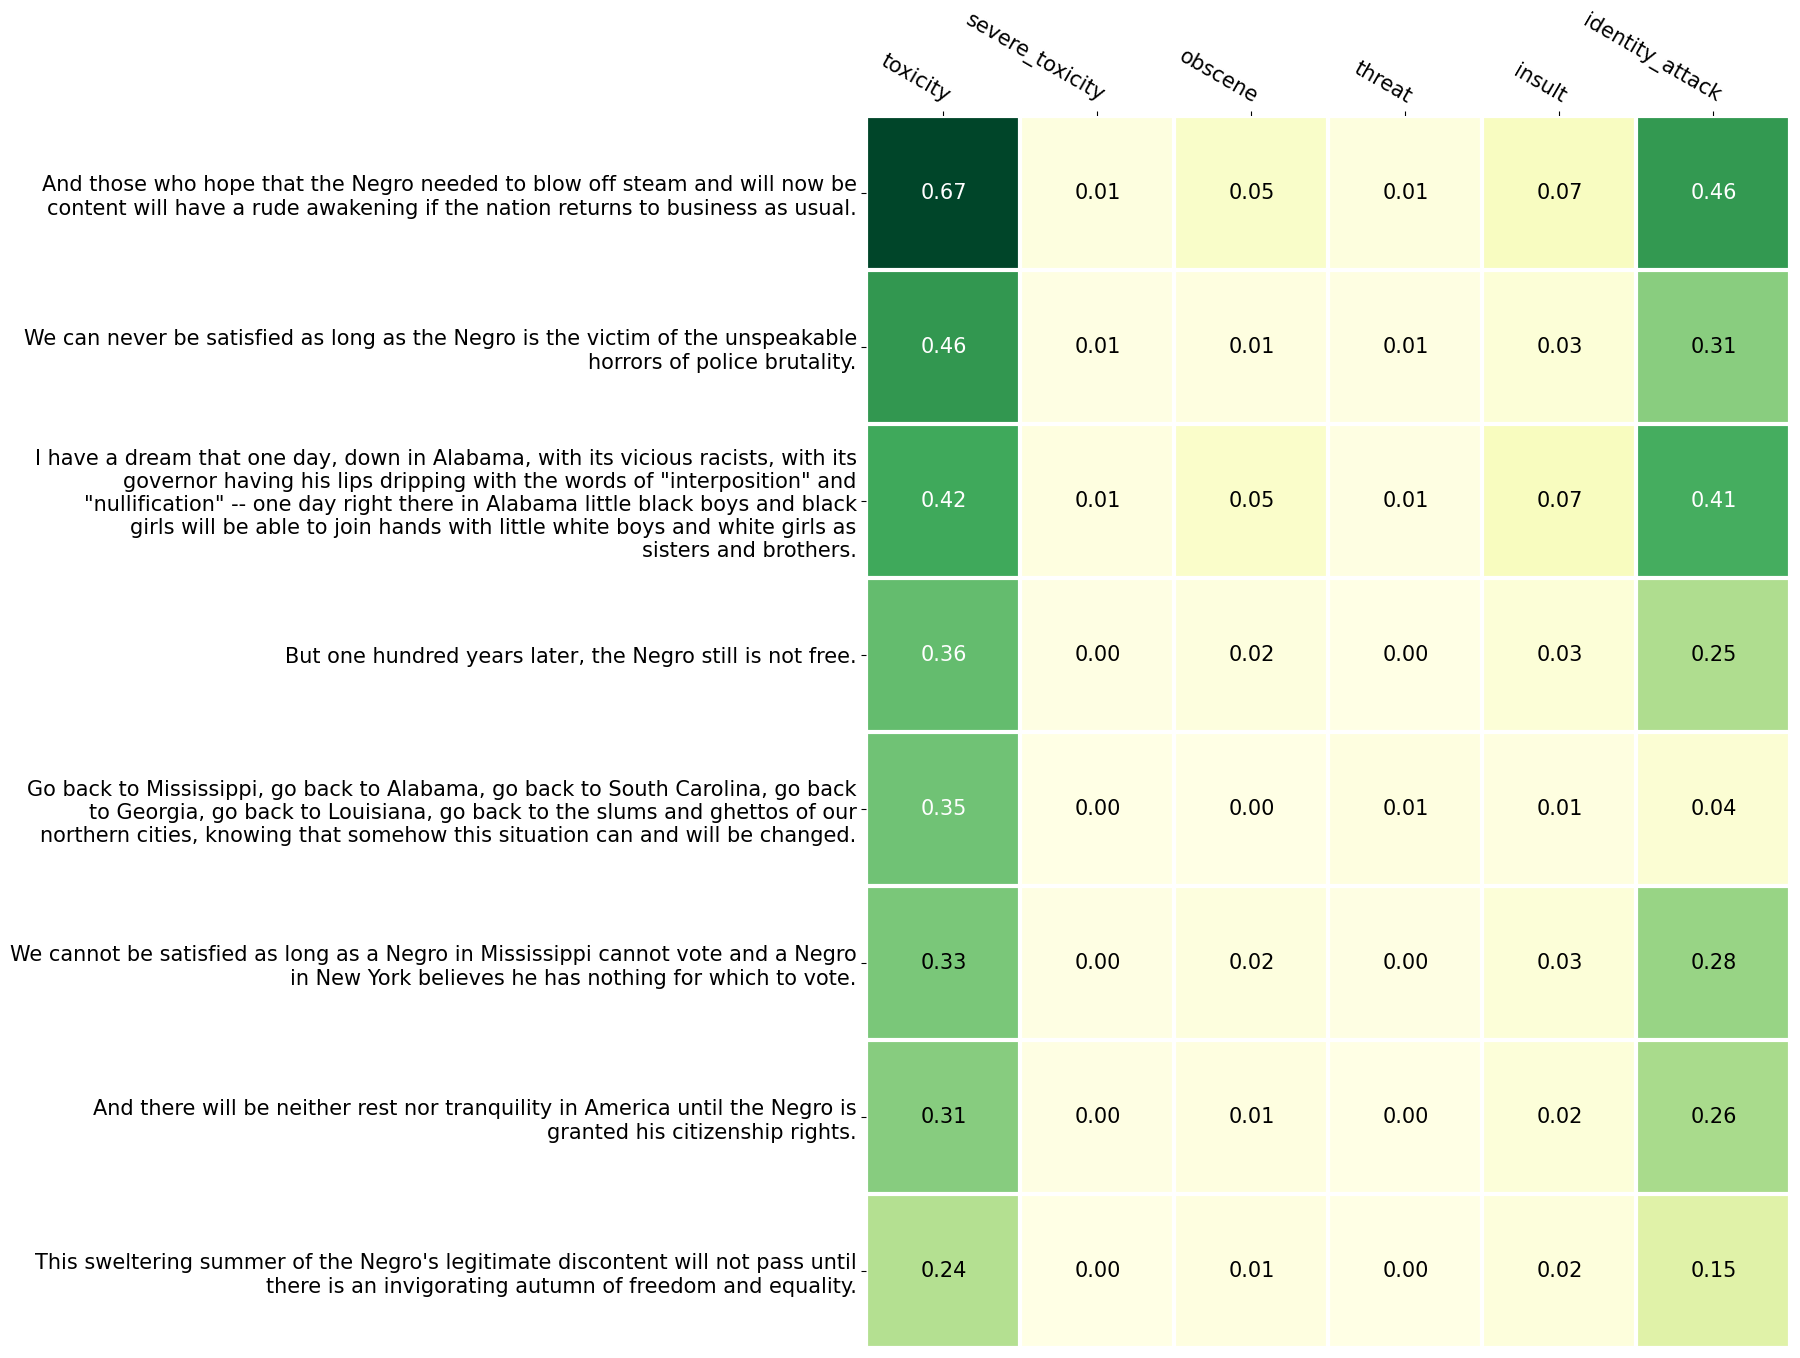

In [36]:
king_results = load_jsonl('king_results.jsonl')
king_results.sort(key=lambda x: x["toxicity"])
generate_heatmap(list(reversed(king_results))[:8])

In [19]:
altered_texts = [
    {"text": "And those who hope that the XXXX needed to blow off steam and will now be content will have a rude awakening if the nation returns to business as usual"},
    {"text": "We can never be satisfied as long as the XXXX is the victim of unspeakable horrors of police brutality"},
    {"text": 'I have a dream that one day, down in Alabama, with its XXXX, with its governor having his lips dripping with the words of "XXXX" and "XXXX" -- one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.'},
    {"text": 'I have a dream that one day, down in Alabama, with its XXXX, with its governor having his lips dripping with the words of "XXXX" and "XXXX" -- one day right there in Alabama little XXXX and XXXX will be able to join hands with little white boys and white girls as sisters and brothers.'},
    {"text": 'I have a dream that one day, down in Alabama, with its XXXX, with its governor having his lips dripping with the words of "XXXX" and "XXXX" -- one day right there in Alabama little black boys and black girls will be able to join hands with little XXXX and XXXX as sisters and brothers.'},
    {"text": 'little black boys'},
    {"text": 'little white boys'},
    {"text": "liitle boys"},
    {"text": 'black'},
    {"text": 'white'}
]

file_name = 'altered_results'
altered_results = generate_results(altered_texts)
dump_jsonl(altered_results, file_name)

100%|██████████| 10/10 [00:47<00:00,  4.71s/it]


overwrite altered_results.jsonl (y/n) y


Wrote 10 records to altered_results.jsonl


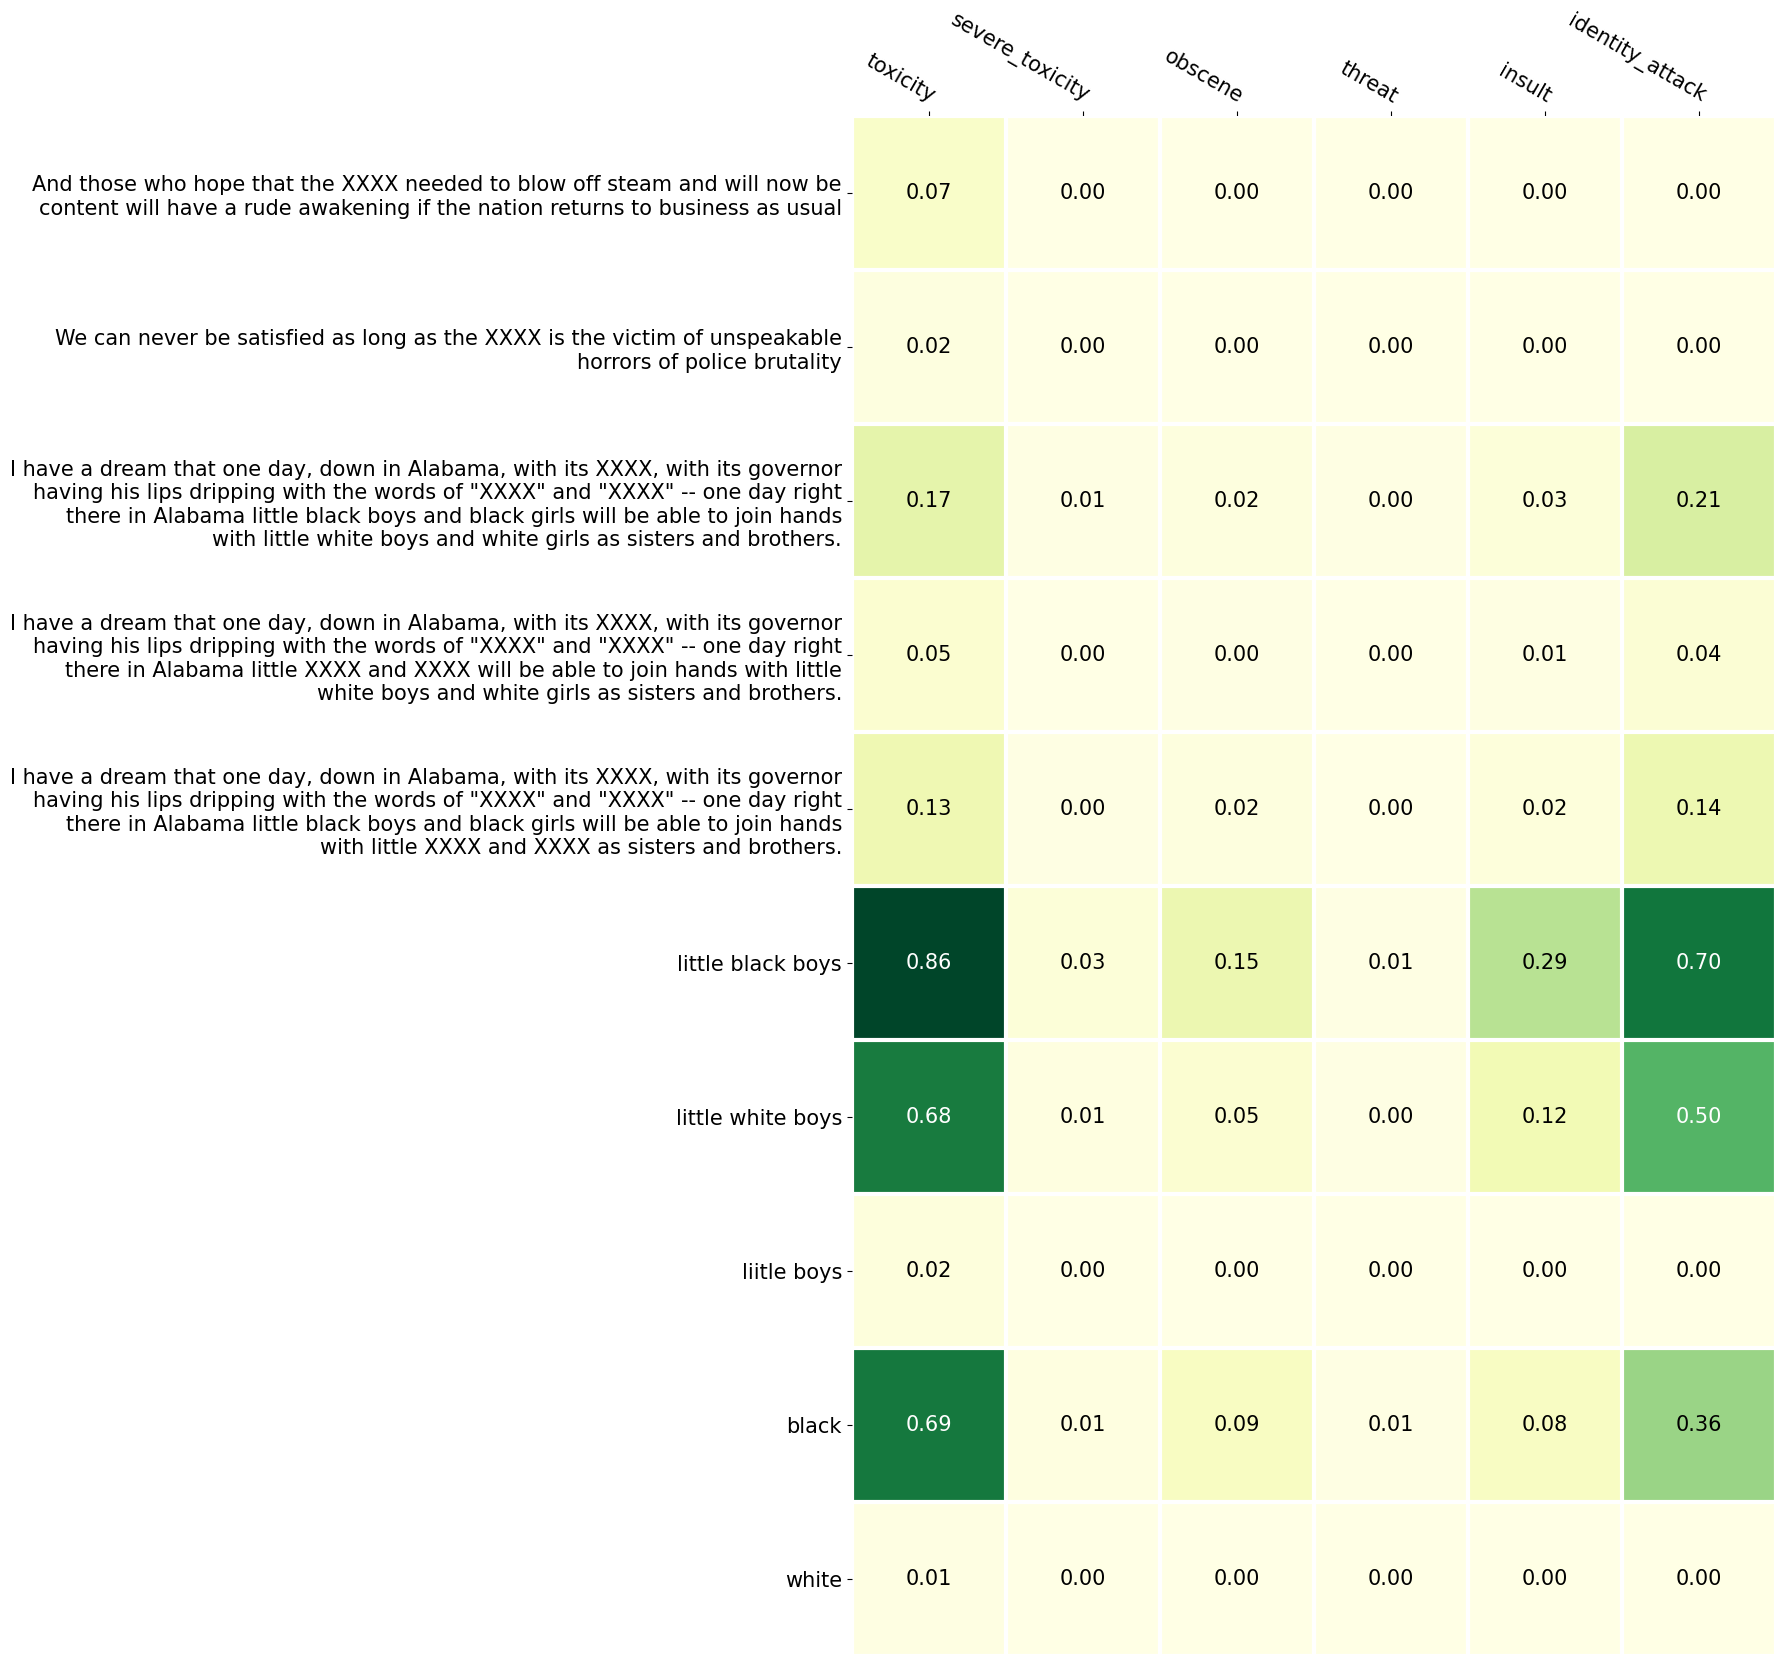

In [14]:
generate_heatmap(altered_results)

In [5]:
%%time
kampf_texts = [
    {"text": "Systematically these negroid parasites in our national body corrupt our innocent fair-haired girls and thus destroy something which can no longer be replaced in this world."},
    # {"text": "And while the patriotic movement is debating with itself whether the ultramontane danger be greater than the Jewish, or vice versa, the Jew is destroying the racial basis of our existence and thereby annihilating our people."},
    # {"text": "From the political point of view it is not in the interests of Great Britain that Germany should be ruined even still more, but such a proceeding would be very much in the interests of the international money-markets manipulated by the Jew"},
    # {"text": "Hence it is that at the present time the Jew is the great agitator for the complete destruction of Germany."},
    {"text": "The French people, who are becoming more and more obsessed by negroid ideas, represent a threatening menace to the existence of the white race in Europe, because they are bound up with the Jewish campaign for world-domination."},
    {"text": "Jews control the financial forces of America on the stock exchange."},
    # {"text": "This pestilential adulteration of the blood, of which hundreds of thousands of our people take no account, is being systematically practised by the Jew today."},
    # {"text": "For the contamination caused by the influx of negroid blood on the Rhine, in the very heart of Europe, is in accord with the sadist and perverse lust for vengeance on the part of the hereditary enemy of our people, just as it suits the purpose of the cool calculating Jew who would use this means of introducing a process of bastardization in the very centre of the European Continent and, by infecting the white race with the blood of an inferior stock, would destroy the foundations of its independent existence."},
    # {"text": "The constructive principle of Aryan humanity is thus displaced by the destructive principle of the Jews, They become the 'ferment of decomposition' among nations and races and, in a broad sense, the wreckers of human civilization."},
    # {"text": "And the swastika signified the mission allotted to us in the struggle for the victory of Aryan mankind and at the same time the triumph of the ideal of creative work which is in itself and always will be anti-Semitic."},
    {"text": 'The Aryan himself was probably at first a nomad and became a settler in the course of ages'},
    {'text': 'The Jew has never been a nomad, but always a parasite, battening on the substance of others'},
    {'text': 'The Aryan himself was probably at first a nomad and became a settler in the course of ages. The Jew has never been a nomad, but always a parasite, battening on the substance of others'},
    # {"text": 'A state which in this age of racial poisoning dedicates itself to the care of its best racial elements must some day become lord of the earth.'},
]

kampf_results = generate_results(kampf_texts)


CPU times: user 7.27 s, sys: 1.28 s, total: 8.56 s
Wall time: 2min 6s


In [ ]:
generate_heatmap(kampf_texts, kampf_results)

In [6]:
%%time
filename = "20200630-Mein Kampf.txt"
kampf_text = find_file(filename)

doc = nlp(kampf_text)
kampf_texts = king_results = generate_results(king_texts)

CPU times: user 4.68 s, sys: 976 ms, total: 5.65 s
Wall time: 5.71 s


In [7]:
%%time
mein_results = generate_results(kampf_texts)
dump_jsonl(mein_results, 'mein_results')

100%|██████████| 4376/4376 [2:13:01<00:00,  1.82s/it]  

mein_results.jsonl
CPU times: user 54min 23s, sys: 15min 34s, total: 1h 9min 57s
Wall time: 2h 13min 2s


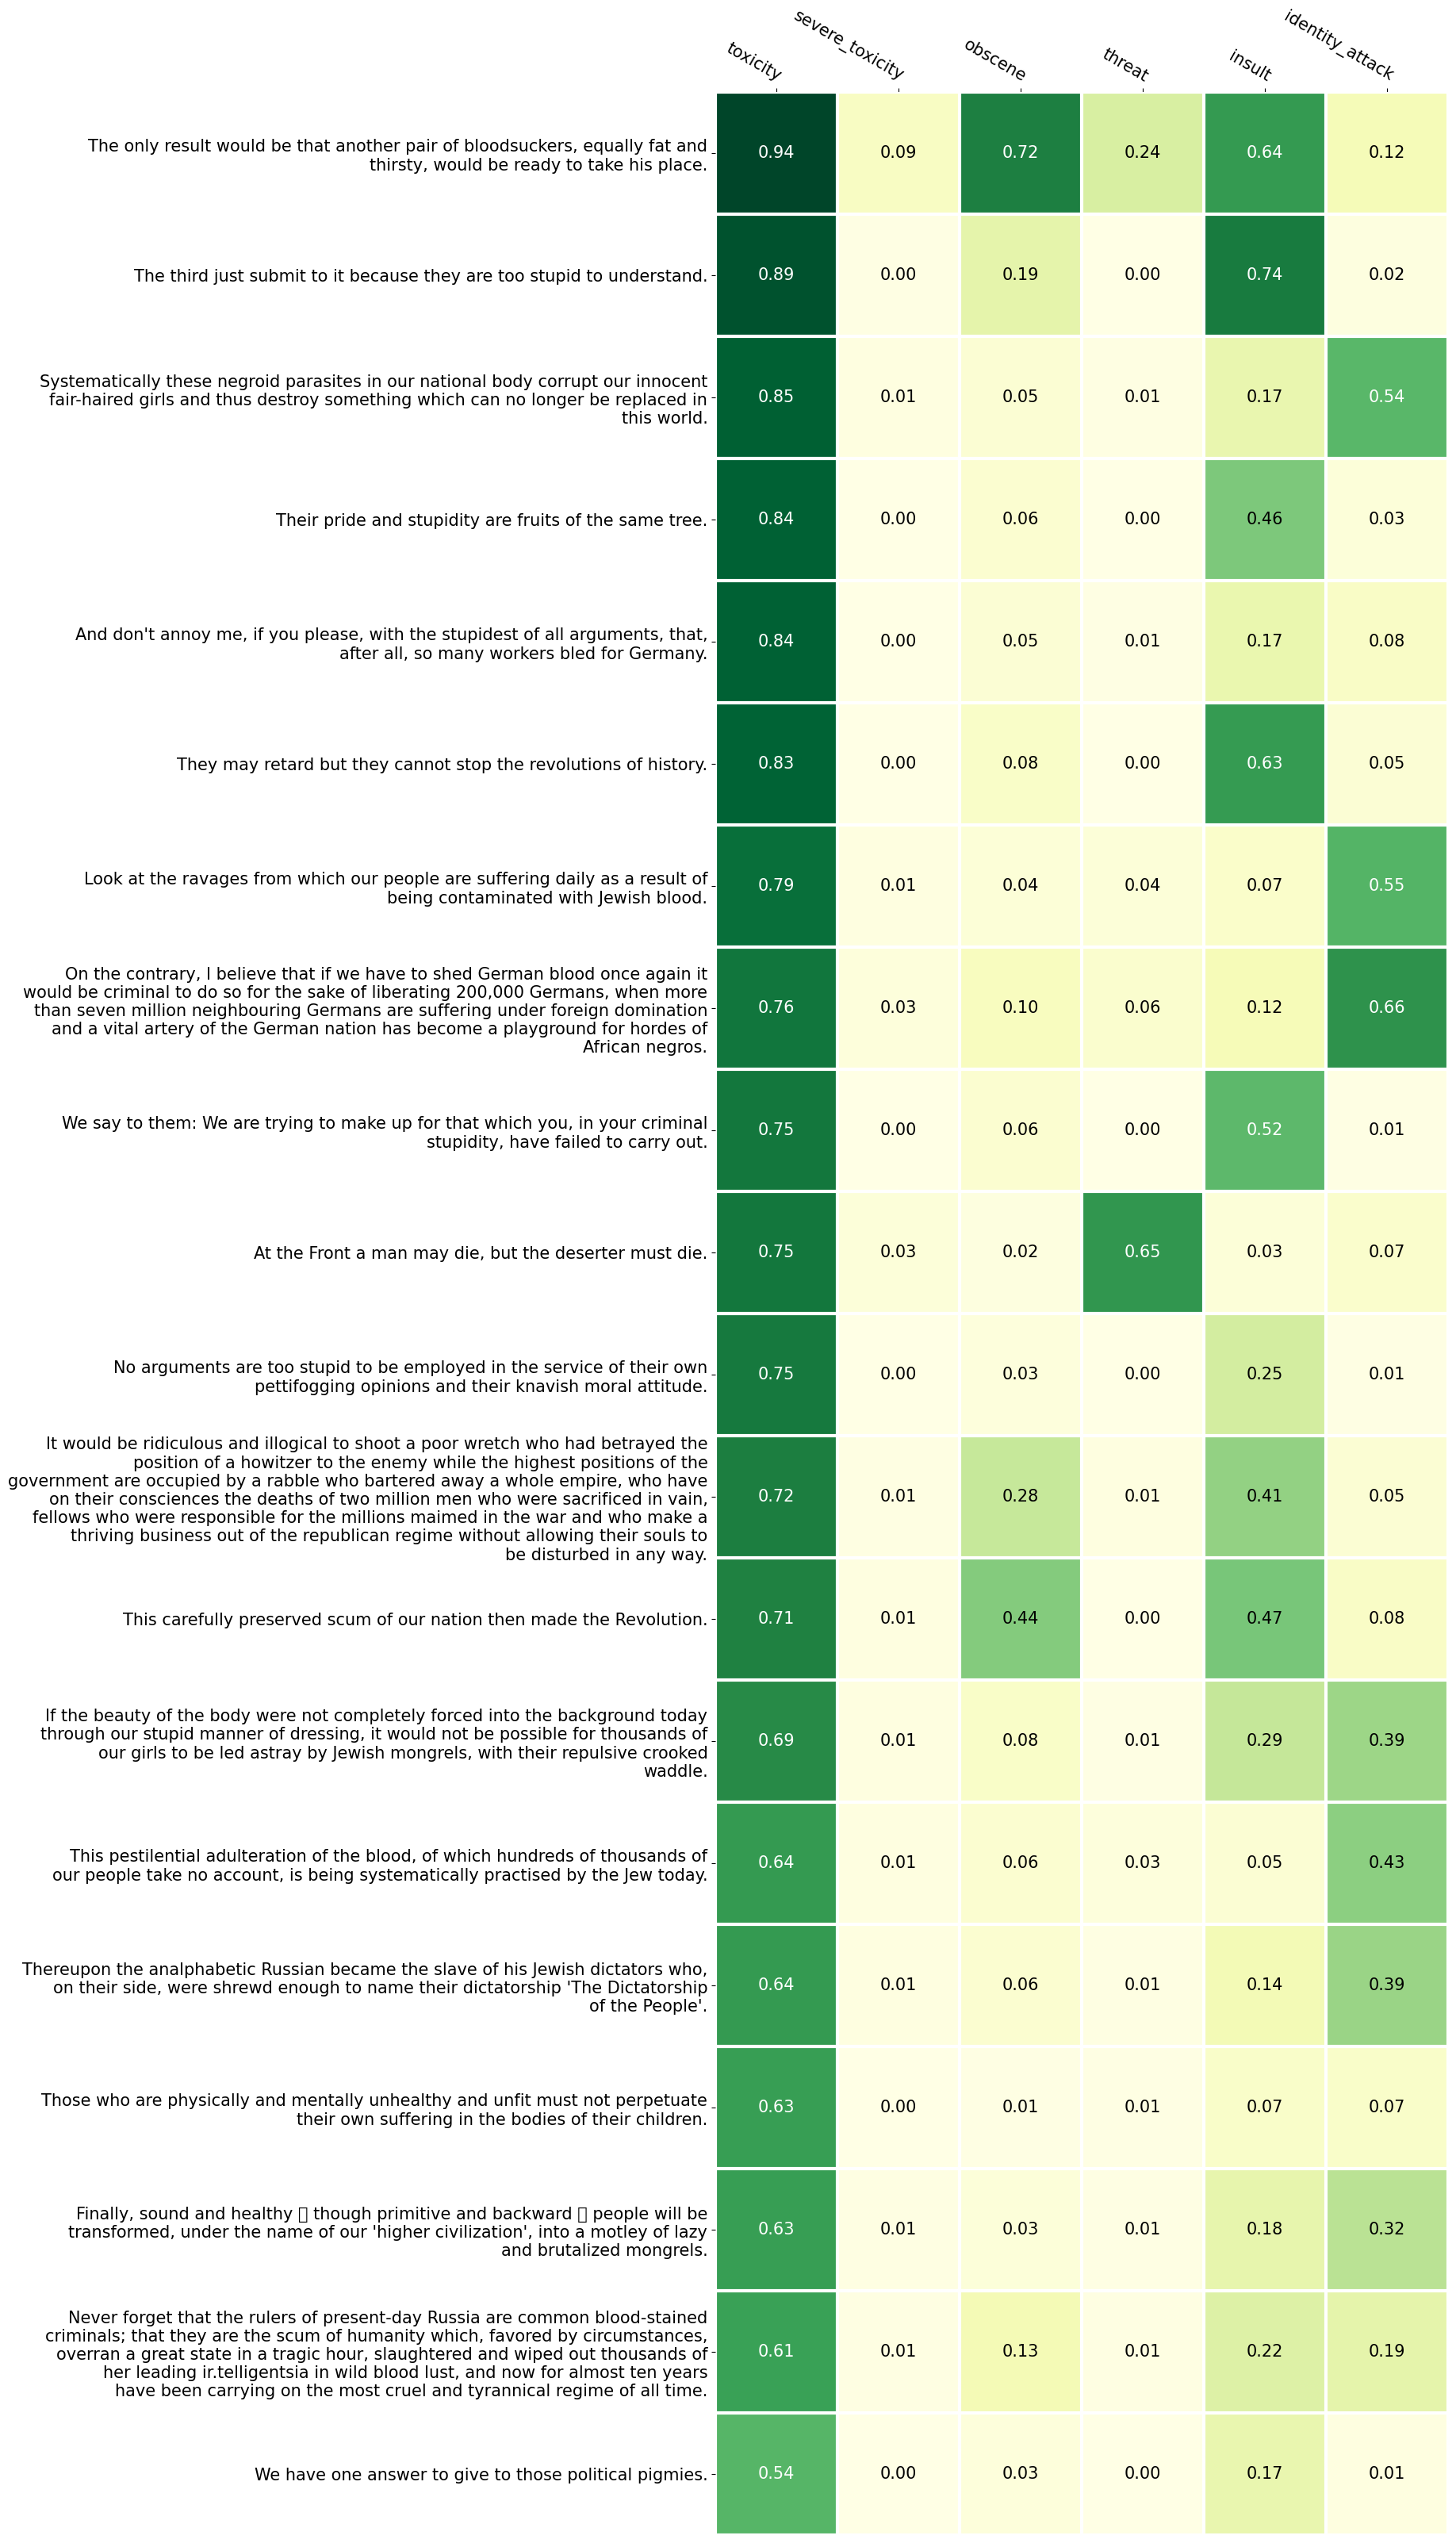

In [16]:
mein_results.sort(key=lambda x: x["toxicity"])
generate_heatmap(list(reversed(mein_results))[:20])

In [ ]:
%%time
dream_texts = [
    {"text": "But 100 years later, the Negro still is not free."}, 
    # {"text": "One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination."}, 
    # {"text": "One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity."}, 
    # {"text": "One hundred years later the Negro is still languished in the corners of American society and finds himself in exile in his own land."},
    # {"text": "This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice"},
    # {"text": "There will be neither rest nor tranquility in America until the Negro is granted his citizenship rights."},
#     {"text": "We can never be satisfied as long as the Negro is the victim of the unspeakable horrors of police brutality."},
    # {"text": "Some of you have come from areas where your quest for freedom left you battered by the storms of persecution and staggered by the winds of police brutality."},
    # {"text": 'And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.'},
    # {"text": 'I have a dream that one day this nation will rise up and live out the true meaning of its creed: "We hold these truths to be self-evident, that all men are created equal.'},
    # {"text": 'I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood.'},
    # {"text": 'I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice.'},
    # {"text": 'I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character.'},
#     {"text": 'I have a dream that one day, down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of "interposition" and "nullification" -- one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.'},
#     {"text": 'I have a dream that one day, down in Alabama, with its Alabamans, with its governor having his lips dripping with the words of "interposition" and "nullification" -- one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.'},
    # {"text": 'I have a dream today!'},
    # {"text": 'I have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight; "and the glory of the Lord shall be revealed and all flesh shall see it together."'},
    
]
dream_results = generate_results(dream_texts)